X education lead conversion case study

With 37 variable we need to predict wheather a particular customer will converted as hot lead or cold lead 

Step 1. Importing and Inspecting the dataframe 

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing necessary libraries 
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import MinMaxScaler 
from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [3]:
lead = pd.read_csv('Leads.csv')
lead.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [4]:
lead.shape

(9240, 37)

In [5]:
lead.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [6]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
pd.set_option('display.max_columns', None)

In [8]:
lead.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

Step 2. Data preparation 

Converting some binary variable(yes/no) to 0 and 1 

In [9]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead[varlist] = lead[varlist].apply(binary_map)

In [10]:
lead.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0          0.0   
1  Organic Search             0            0          0          5.0   
2  Direct Traffic             0            0          1          2.0   
3  Direct Traffic             0            0          0          1.0   
4          Google             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course  Search  Magazine  \
0                       Better Career Prospects       0         0   
1                       Better Career Prospects       0         0   
2                       Better Career Prospects       0         0   
3                       Better Career Prospects       0         0   
4                       Better Career Prospects       0         0   

   Newspaper Article  X Education Forums  Newspaper  Digital Advertisement  \
0                  0                   0          0                      0   
1                  0                   0          0                      0   
2                  0                   0          0                      0   
3                  0                   0          0                      0   
4                  0                   0          0                      0   

   Through Recommendations  Receive More Updates About Our Courses  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       0   
3                        0                                       0   
4                        0                                       0   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

   Update me on Supply Chain Content  Get updates on DM Content  \
0                                  0                          0   
1                                  0                          0   
2                                  0                          0   
3                        

In [11]:
# Replacing Select with NaN
lead.replace('Select',np.NaN,inplace=True)
lead.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0          0.0   
1  Organic Search             0            0          0          5.0   
2  Direct Traffic             0            0          1          2.0   
3  Direct Traffic             0            0          0          1.0   
4          Google             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                      NaN                                NaN   
1   India                      NaN                                NaN   
2   India  Business Administration                                NaN   
3   India    Media and Advertising                      Word Of Mouth   
4   India                      NaN                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course  Search  Magazine  \
0                       Better Career Prospects       0         0   
1                       Better Career Prospects       0         0   
2                       Better Career Prospects       0         0   
3                       Better Career Prospects       0         0   
4                       Better Career Prospects       0         0   

   Newspaper Article  X Education Forums  Newspaper  Digital Advertisement  \
0                  0                   0          0                      0   
1                  0                   0          0                      0   
2                  0                   0          0                      0   
3                  0                   0          0                      0   
4                  0                   0          0                      0   

   Through Recommendations  Receive More Updates About Our Courses  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       0   
3                        0                                       0   
4                        0                                       0   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

   Update me on Supply Chain Content  Get updates on DM Content  \
0                                  0                          0   
1                                  0                          0   
2                                  0                          0   
3                        

In [12]:
# Checking the percentage of missing values
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [13]:
# Removing the columns with missing value percentage above 40%
lead.drop(['How did you hear about X Education','Lead Quality','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1,inplace=True)

In [14]:
#Dropping the irrelevant columns
lead.drop(['Prospect ID','A free copy of Mastering The Interview','I agree to pay the amount through cheque','Tags','Last Notable Activity','Last Activity','Country','City','What matters most to you in choosing a course','Lead Number'],axis=1,inplace=True)

In [15]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9204 non-null   object 
 2   Do Not Email                            9240 non-null   int64  
 3   Do Not Call                             9240 non-null   int64  
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9103 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9103 non-null   float64
 8   Specialization                          5860 non-null   object 
 9   What is your current occupation         6550 non-null   object 
 10  Search                                  9240 non-null   int6

In [16]:
# Checking the percentage of missing values for leftover columns
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead Origin                                0.00
Lead Source                                0.39
Do Not Email                               0.00
Do Not Call                                0.00
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Specialization                            36.58
What is your current occupation           29.11
Search                                     0.00
Magazine                                   0.00
Newspaper Article                          0.00
X Education Forums                         0.00
Newspaper                                  0.00
Digital Advertisement                      0.00
Through Recommendations                    0.00
Receive More Updates About Our Courses     0.00
Update me on Supply Chain Content          0.00
Get updates on DM Content                  0.00
dtype: float64

Imputing missing values 

1. For numeric var we can impute either with mean, median and mode

2. For categorical var we can impute missing value with most occuring value using mode function 

3. Remove rows with minimun missing values

In [17]:
# Removing NaN lead Origin rows
lead = lead[~pd.isnull(lead['Lead Source'])]

In [18]:
#imputing the null values in the 'What is your current occupation' and specialisation column with the mode(most occuring values)
lead['What is your current occupation'].fillna(lead['What is your current occupation'].mode()[0],inplace=True)
lead.Specialization.fillna(lead.Specialization.mode()[0],inplace=True)

In [19]:
#Before we impute missing values for numeric var, we need to find the outliers
num_lead = lead[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']]

In [20]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_lead.describe(percentiles=[.25, .5, .75, .90, .95, .99])

TotalVisits  Page Views Per Visit  Total Time Spent on Website
count  9074.000000           9074.000000                  9204.000000
mean      3.456028              2.370151                   489.005541
std       4.858802              2.160871                   547.980340
min       0.000000              0.000000                     0.000000
25%       1.000000              1.000000                    14.000000
50%       3.000000              2.000000                   250.000000
75%       5.000000              3.200000                   938.000000
90%       7.000000              5.000000                  1380.000000
95%      10.000000              6.000000                  1562.000000
99%      17.000000              9.000000                  1839.970000
max     251.000000             55.000000                  2272.000000

In [21]:
sns.boxplot(lead['TotalVisits'])

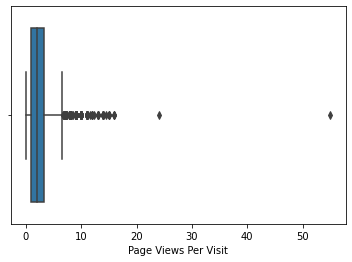

In [22]:
sns.boxplot(lead['Page Views Per Visit'])

In [23]:
#Outlier treatment for total visit
Q1 = lead['TotalVisits'].quantile(0.05)
Q3 = lead['TotalVisits'].quantile(0.95)
IQR = Q3 - Q1
lead = lead[(lead['TotalVisits'] >= Q1 - 1.5*IQR) & (lead['TotalVisits'] <= Q3 + 1.5*IQR)]

#outlier treatment for pages views per visit
Q1 = lead['Page Views Per Visit'].quantile(0.05)
Q3 = lead['Page Views Per Visit'].quantile(0.95)
IQR = Q3 - Q1
lead = lead[(lead['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (lead['Page Views Per Visit'] <= Q3 + 1.5*IQR)]

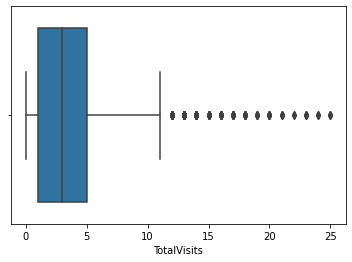

In [24]:
sns.boxplot(lead['TotalVisits'])

In [25]:
sns.boxplot(lead['Page Views Per Visit'])

In [26]:
#imputing missing value with the median
lead.TotalVisits.fillna(lead.TotalVisits.median(),inplace=True)
lead['Page Views Per Visit'].fillna(lead['Page Views Per Visit'].median(),inplace=True)

In [27]:
#Re-checking for the missing values
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Specialization                            0.0
What is your current occupation           0.0
Search                                    0.0
Magazine                                  0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
Receive More Updates About Our Courses    0.0
Update me on Supply Chain Content         0.0
Get updates on DM Content                 0.0
dtype: float64

Step 3 

EDA for some insight


In [28]:
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(16,12))

# heatmap
sns.heatmap(lead.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [29]:
# dropping columns with no correlations 
lead.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content'],axis=1,inplace=True)

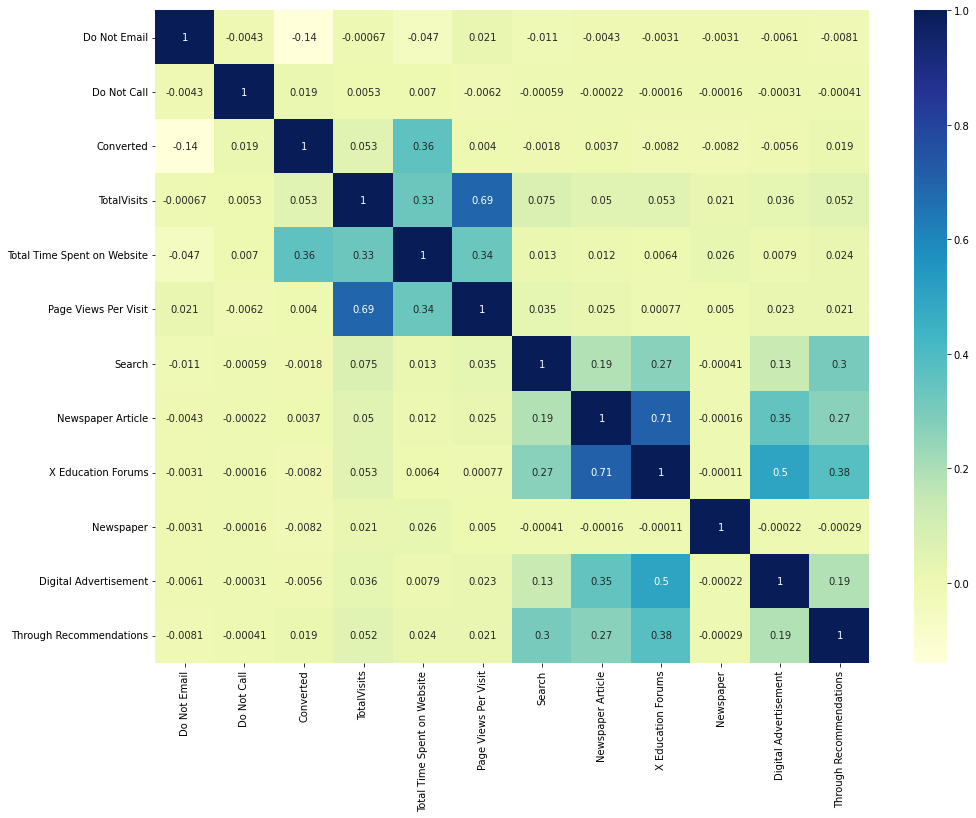

In [30]:
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(16,12))

# heatmap
sns.heatmap(lead.corr(), cmap="YlGnBu", annot=True)
plt.show()

Univariate Analysis

In [31]:
s1=sns.countplot(x = "Lead Origin", hue = "Converted", data = lead)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [32]:
fig, axs = plt.subplots(figsize = (15,7.5))
s2=sns.countplot(x = "Lead Source", hue = "Converted", data = lead)
s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
plt.show()

Dummy variable creation for model building 


In [33]:
# Create dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(lead[['Lead Origin', 'Lead Source', 'Specialization',
       'What is your current occupation' 
       ]], drop_first=True) 
                               
# Add the results to the master dataframe
df = pd.concat([lead, dummy], axis=1)

In [34]:
# Drop the variables for which the dummy variables have been created

df = df.drop(['Lead Origin', 'Lead Source','Specialization','What is your current occupation'], 1)

In [35]:
df.head()

Do Not Email  Do Not Call  Converted  TotalVisits  \
0             0            0          0          0.0   
1             0            0          0          5.0   
2             0            0          1          2.0   
3             0            0          0          1.0   
4             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  Search  \
0                            0                   0.0       0   
1                          674                   2.5       0   
2                         1532                   2.0       0   
3                          305                   1.0       0   
4                         1428                   1.0       0   

   Newspaper Article  X Education Forums  Newspaper  Digital Advertisement  \
0                  0                   0          0                      0   
1                  0                   0          0                      0   
2                  0                   0          0                      0   
3                  0                   0          0                      0   
4                  0                   0          0                      0   

   Through Recommendations  Lead Origin_Landing Page Submission  \
0                        0                                    0   
1                        0                                    0   
2                        0                                    1   
3                        0                                    1   
4                        0                                    1   

   Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
0                           0                     0                   0   
1                           0                     0                   0   
2                           1                     0                   0   
3                           1                     0                   0   
4                           0                     0                   1   

   Lead Source_Live Chat  Lead Source_NC_EDM  Lead Source_Olark Chat  \
0                      0                   0                       1   
1                      0                   0                       0   
2                      0                   0                       0   
3                      0                   0                       0   
4                      0                   0                       0   

   Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
0                           0                              0   
1                           1                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   Lead Source_Press_Release  Lead Source_Reference  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   Lead Source_Referral Sites  Lead Source_Social Media  Lead Source_WeLearn  \
0                           0                         0                    0   
1                           0                         0                    0   
2                           0                         0                    0   
3                           0                         0                    0   
4                           0                         0           

In [36]:
df.shape

(9048, 57)

In [37]:
uniqueValues = df.nunique()
print(uniqueValues)

Do Not Email                                               2
Do Not Call                                                2
Converted                                                  2
TotalVisits                                               26
Total Time Spent on Website                             1715
Page Views Per Visit                                      99
Search                                                     2
Newspaper Article                                          2
X Education Forums                                         2
Newspaper                                                  2
Digital Advertisement                                      2
Through Recommendations                                    2
Lead Origin_Landing Page Submission                        2
Lead Origin_Lead Add Form                                  2
Lead Origin_Lead Import                                    2
Lead Source_Direct Traffic                                 2
Lead Source_Facebook    

Test-train split

In [38]:
# Put all the feature variables in X

# Putting target variable in y
y = df['Converted']

y.head()

X=df.drop('Converted', axis=1)
X.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
0             0            0          0.0                            0   
1             0            0          5.0                          674   
2             0            0          2.0                         1532   
3             0            0          1.0                          305   
4             0            0          2.0                         1428   

   Page Views Per Visit  Search  Newspaper Article  X Education Forums  \
0                   0.0       0                  0                   0   
1                   2.5       0                  0                   0   
2                   2.0       0                  0                   0   
3                   1.0       0                  0                   0   
4                   1.0       0                  0                   0   

   Newspaper  Digital Advertisement  Through Recommendations  \
0          0                      0                        0   
1          0                      0                        0   
2          0                      0                        0   
3          0                      0                        0   
4          0                      0                        0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   Lead Source_Google  Lead Source_Live Chat  Lead Source_NC_EDM  \
0                   0                      0                   0   
1                   0                      0                   0   
2                   0                      0                   0   
3                   0                      0                   0   
4                   1                      0                   0   

   Lead Source_Olark Chat  Lead Source_Organic Search  \
0                       1                           0   
1                       0                           1   
2                       0                           0   
3                       0                           0   
4                       0                           0   

   Lead Source_Pay per Click Ads  Lead Source_Press_Release  \
0                              0                          0   
1                              0                          0   
2                              0                          0   
3                              0                          0   
4                              0                          0   

   Lead Source_Reference  Lead Source_Referral Sites  \
0                      0                           0   
1                      0                           0   
2                      0                           0   
3                      0                           0   
4                      0                           0   

   Lead Source_Social Media  Lead Source_WeLearn  \
0                         0                    0   
1                         0                    0   
2                         0                    0   
3                         0                    0   
4                         0                    0   

   Lead Source_Welingak Website  Lead Source_bing  

In [39]:
X.shape

(9048, 56)

In [40]:
# Split the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

Step 5: Feature Scaling

In [41]:
# Scale the three numeric features present in the dataset

scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
8425             0            0         0.00                     0.000000   
8341             0            0         0.00                     0.000000   
7376             0            0         0.08                     0.194407   
7414             0            0         0.00                     0.000000   
3521             0            0         0.20                     0.504217   

      Page Views Per Visit  Search  Newspaper Article  X Education Forums  \
8425              0.000000       0                  0                   0   
8341              0.000000       0                  0                   0   
7376              0.133333       0                  0                   0   
7414              0.000000       0                  0                   0   
3521              0.333333       0                  0                   0   

      Newspaper  Digital Advertisement  Through Recommendations  \
8425          0                      0                        0   
8341          0                      0                        0   
7376          0                      0                        0   
7414          0                      0                        0   
3521          0                      0                        0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
8425                                    0                          0   
8341                                    0                          0   
7376                                    1                          0   
7414                                    0                          0   
3521                                    1                          0   

      Lead Origin_Lead Import  Lead Source_Direct Traffic  \
8425                        0                           0   
8341                        0                           0   
7376                        0                           1   
7414                        0                           0   
3521                        0                           0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Live Chat  \
8425                     0                   0                      0   
8341                     0                   0                      0   
7376                     0                   0                      0   
7414                     0                   0                      0   
3521                     0                   1                      0   

      Lead Source_NC_EDM  Lead Source_Olark Chat  Lead Source_Organic Search  \
8425                   0                       1                           0   
8341                   0                       1                           0   
7376                   0                       0                           0   
7414                   0                       1                           0   
3521                   0                       0                           0   

      Lead Source_Pay per Click Ads  Lead Source_Press_Release  \
8425                              0                          0   
8341                              0                          0   
7376                              0                          0   
7414                              0                          0   
3521                              0                          0   

      Lead Source_Reference  Lead Source_Referral Sites  \
8425                      0                           0   
8341                      0                           0   
7376                      0                           0   
7414                      0                           0   
3521                      0                           0   

      Lead Source_Social Media  Lead Source_WeLearn  \
8425                         0                    0   
8341                         0                    0   
7376                         0          

In [42]:
# Checking the Churn Rate
Converted = (sum(df['Converted'])/len(df['Converted'].index))*100
Converted

37.8868258178603

Checking correlation 

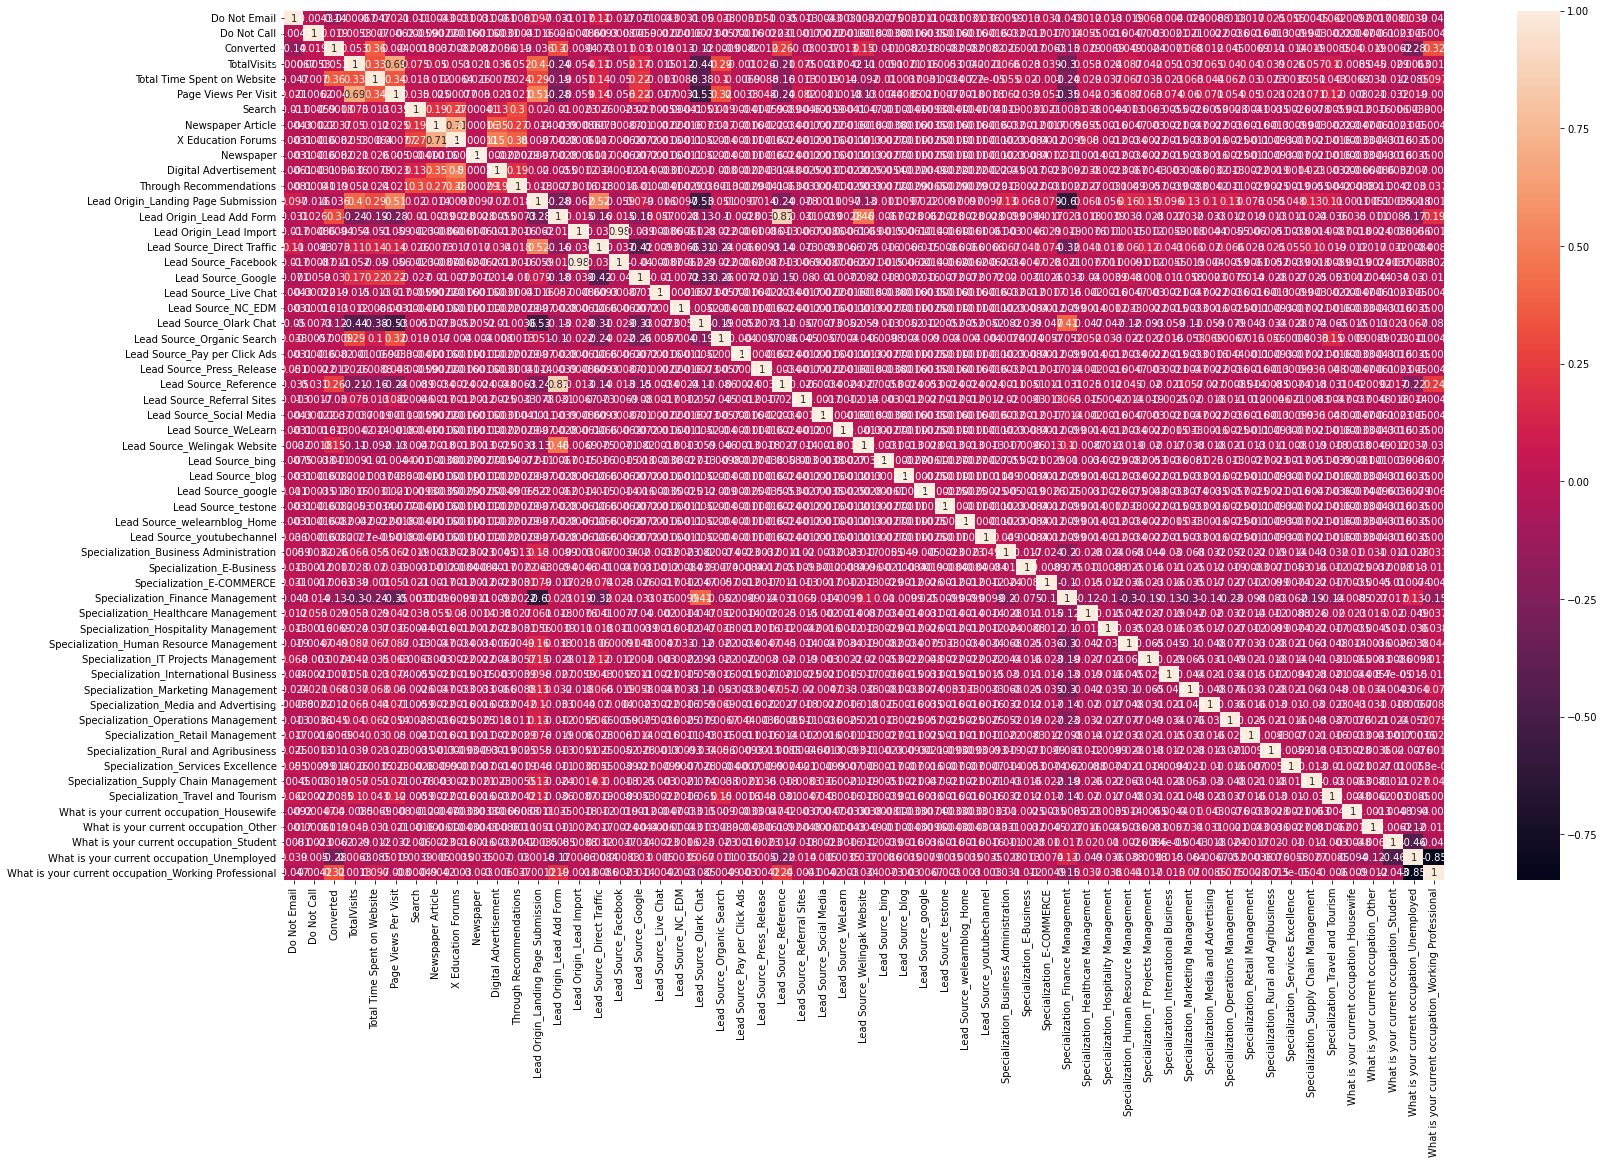

In [43]:
plt.figure(figsize = (26,16))        # Size of the figure
sns.heatmap(df.corr(),annot = True)
plt.show()

Running Your First Training Model

In [44]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

Feature Selection Using RFE

In [45]:
# Import 'LogisticRegression' and create a LogisticRegression object
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [46]:
# Import RFE and select 15 variables

from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [47]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 26),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 7),
 ('Search', False, 17),
 ('Newspaper Article', False, 29),
 ('X Education Forums', False, 5),
 ('Newspaper', True, 1),
 ('Digital Advertisement', False, 2),
 ('Through Recommendations', False, 21),
 ('Lead Origin_Landing Page Submission', False, 20),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Direct Traffic', False, 6),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 12),
 ('Lead Source_Live Chat', False, 23),
 ('Lead Source_NC_EDM', False, 14),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 11),
 ('Lead Source_Pay per Click Ads', False, 27),
 ('Lead Source_Press_Release', False, 42),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 4),
 ('Lead Source_Social Media', False, 30),
 ('Lead Source_WeLear

In [48]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Newspaper', 'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Specialization_Hospitality Management',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [49]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'Page Views Per Visit', 'Search', 'Newspaper Article',
       'X Education Forums', 'Digital Advertisement',
       'Through Recommendations', 'Lead Origin_Landing Page Submission',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Internat

In [50]:
# Select only the columns selected by RFE

X_train = X_train[col]

1 model

In [51]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6317
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2982.1
Date:                Sun, 11 Sep 2022   Deviance:                       5964.2
Time:                        12:18:55   Pearson chi2:                 6.49e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0730      0.564     -3.676      0.000      -3.178      -0.968
Do Not Email                                            -1.2792      0.160     -8.000      0.000      -1.593      -0.966
TotalVisits                                              1.5979      0.285      5.604      0.000       1.039       2.157
Total Time Spent on Website                              4.6119      0.157     29.352      0.000       4.304       4.920
Newspaper                                              -24.5744   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
Lead Origin_Lead Add Form                                3.0701      1.213      2.531      0.011       0.693       5.447
Lead Origin_Lead Import                                 23.1295   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Facebook                                   -21.3227   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Source_Olark Chat                                   1.0632      0.104     10.263      0.000       0.860       1.266
Lead Source_Reference                                    1.2960      1.230      1.054      0.292      -1.114       3.706
Lead Source_Welingak Website                             3.8976      1.576      2.474      0.013       0.810       6.986
Specialization_Hospitality Management                   -0.7290      0.313     -2.331      0.020      -1.342      -0.116
What is your current occupation_Housewife               22.5352   1.44e+04      0.002      0.999   -2.81e+04    2.82e+04
What is your current occupation_Student                 -0.2203      0.592     -0.372      0.710      -1.381       0.941
What is your current occupation_Unemployed              -0.2670      0.557     -0.479      0.632      -1.359       0.825
What is your current occupation_Working Professional     2.5246      0.582      4.334      0.000       1.383       3.666
========================================================================================================================
"""

In [52]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
4                           Lead Origin_Lead Add Form  83.48
8                               Lead Source_Reference  65.30
5                             Lead Origin_Lead Import  22.15
6                                Lead Source_Facebook  22.15
9                        Lead Source_Welingak Website  19.45
13         What is your current occupation_Unemployed   4.91
1                                         TotalVisits   2.94
2                         Total Time Spent on Website   2.30
7                              Lead Source_Olark Chat   1.91
14  What is your current occupation_Working Profes...   1.50
12            What is your current occupation_Student   1.11
0                                        Do Not Email   1.10
10              Specialization_Hospitality Management   1.02
11          What is your current occupation_Housewife   1.01
3                                           Newspaper   1.00

VIFs seem to be in a decent range except for three variables. Let's first drop the variable Lead ORigin_lead add form since it has a high p-value as well as a high VIF.

Model 2

In [53]:
X_train.drop('Lead Origin_Lead Add Form', axis = 1, inplace = True)


In [54]:
# Refit the model with the new set of features
logm2 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6318
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2985.6
Date:                Sun, 11 Sep 2022   Deviance:                       5971.2
Time:                        12:18:56   Pearson chi2:                 6.50e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0640      0.564     -3.661      0.000      -3.169      -0.959
Do Not Email                                            -1.2814      0.160     -8.018      0.000      -1.595      -0.968
TotalVisits                                              1.5816      0.285      5.559      0.000       1.024       2.139
Total Time Spent on Website                              4.6011      0.157     29.338      0.000       4.294       4.908
Newspaper                                              -24.5687   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
Lead Origin_Lead Import                                 23.1231   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Facebook                                   -21.3254   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Source_Olark Chat                                   1.0549      0.103     10.206      0.000       0.852       1.257
Lead Source_Reference                                    4.3571      0.230     18.918      0.000       3.906       4.809
Lead Source_Welingak Website                             6.9587      1.011      6.880      0.000       4.976       8.941
Specialization_Hospitality Management                   -0.7299      0.313     -2.335      0.020      -1.342      -0.117
What is your current occupation_Housewife               22.5304   1.44e+04      0.002      0.999   -2.81e+04    2.82e+04
What is your current occupation_Student                 -0.2221      0.592     -0.375      0.708      -1.383       0.938
What is your current occupation_Unemployed              -0.2665      0.557     -0.479      0.632      -1.358       0.825
What is your current occupation_Working Professional     2.5216      0.582      4.331      0.000       1.380       3.663
========================================================================================================================
"""

In [55]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
4                             Lead Origin_Lead Import  22.15
5                                Lead Source_Facebook  22.15
12         What is your current occupation_Unemployed   4.91
1                                         TotalVisits   2.94
2                         Total Time Spent on Website   2.30
6                              Lead Source_Olark Chat   1.91
13  What is your current occupation_Working Profes...   1.50
7                               Lead Source_Reference   1.33
11            What is your current occupation_Student   1.11
0                                        Do Not Email   1.10
8                        Lead Source_Welingak Website   1.07
9               Specialization_Hospitality Management   1.02
10          What is your current occupation_Housewife   1.01
3                                           Newspaper   1.00

In [56]:
X_train.drop('Lead Origin_Lead Import', axis = 1, inplace = True)

Model 3

In [57]:
# Refit the model with the new set of features
logm2 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6319
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2986.5
Date:                Sun, 11 Sep 2022   Deviance:                       5973.1
Time:                        12:18:56   Pearson chi2:                 6.50e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0611      0.564     -3.656      0.000      -3.166      -0.956
Do Not Email                                            -1.2813      0.160     -8.018      0.000      -1.595      -0.968
TotalVisits                                              1.5741      0.284      5.534      0.000       1.017       2.132
Total Time Spent on Website                              4.5987      0.157     29.332      0.000       4.291       4.906
Newspaper                                              -24.5665   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
Lead Source_Facebook                                     1.6637      0.466      3.566      0.000       0.749       2.578
Lead Source_Olark Chat                                   1.0532      0.103     10.193      0.000       0.851       1.256
Lead Source_Reference                                    4.3556      0.230     18.912      0.000       3.904       4.807
Lead Source_Welingak Website                             6.9561      1.011      6.877      0.000       4.974       8.939
Specialization_Hospitality Management                   -0.7295      0.313     -2.335      0.020      -1.342      -0.117
What is your current occupation_Housewife               22.5289   1.44e+04      0.002      0.999   -2.81e+04    2.82e+04
What is your current occupation_Student                 -0.2479      0.592     -0.419      0.675      -1.408       0.912
What is your current occupation_Unemployed              -0.2668      0.557     -0.479      0.632      -1.358       0.824
What is your current occupation_Working Professional     2.5212      0.582      4.330      0.000       1.380       3.662
========================================================================================================================
"""

In [58]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
11         What is your current occupation_Unemployed  4.91
1                                         TotalVisits  2.94
2                         Total Time Spent on Website  2.30
5                              Lead Source_Olark Chat  1.91
12  What is your current occupation_Working Profes...  1.50
6                               Lead Source_Reference  1.33
10            What is your current occupation_Student  1.11
0                                        Do Not Email  1.10
7                        Lead Source_Welingak Website  1.07
4                                Lead Source_Facebook  1.02
8               Specialization_Hospitality Management  1.02
9           What is your current occupation_Housewife  1.01
3                                           Newspaper  1.00

The VIFs are now all less than 5. So let's drop the ones with the high p-values beginning with What is your current occupation_Housewife

In [59]:
# Droping `What is your current occupation_Housewife`.
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

Model 4

In [60]:
# Refit the model with the new set of features
logm2 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6320
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2990.5
Date:                Sun, 11 Sep 2022   Deviance:                       5981.1
Time:                        12:18:56   Pearson chi2:                 6.51e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3629      0.494     -2.759      0.006      -2.331      -0.395
Do Not Email                                            -1.2853      0.160     -8.033      0.000      -1.599      -0.972
TotalVisits                                              1.5458      0.284      5.441      0.000       0.989       2.103
Total Time Spent on Website                              4.5931      0.157     29.318      0.000       4.286       4.900
Newspaper                                              -22.5581   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Source_Facebook                                     1.6571      0.466      3.553      0.000       0.743       2.571
Lead Source_Olark Chat                                   1.0450      0.103     10.125      0.000       0.843       1.247
Lead Source_Reference                                    4.3548      0.230     18.923      0.000       3.904       4.806
Lead Source_Welingak Website                             6.9496      1.012      6.871      0.000       4.967       8.932
Specialization_Hospitality Management                   -0.7294      0.312     -2.334      0.020      -1.342      -0.117
What is your current occupation_Student                 -0.9389      0.528     -1.779      0.075      -1.973       0.095
What is your current occupation_Unemployed              -0.9575      0.488     -1.962      0.050      -1.914      -0.001
What is your current occupation_Working Professional     1.8295      0.517      3.541      0.000       0.817       2.842
========================================================================================================================
"""

In [61]:
X_train.drop('Newspaper', axis = 1, inplace = True)

Model 5

In [62]:
# Refit the model with the new set of features
logm2 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6321
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2992.6
Date:                Sun, 11 Sep 2022   Deviance:                       5985.3
Time:                        12:18:56   Pearson chi2:                 6.51e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3561      0.494     -2.746      0.006      -2.324      -0.388
Do Not Email                                            -1.2841      0.160     -8.028      0.000      -1.598      -0.971
TotalVisits                                              1.5306      0.284      5.391      0.000       0.974       2.087
Total Time Spent on Website                              4.5827      0.156     29.287      0.000       4.276       4.889
Lead Source_Facebook                                     1.6528      0.466      3.544      0.000       0.739       2.567
Lead Source_Olark Chat                                   1.0406      0.103     10.090      0.000       0.838       1.243
Lead Source_Reference                                    4.3499      0.230     18.905      0.000       3.899       4.801
Lead Source_Welingak Website                             6.9446      1.011      6.866      0.000       4.962       8.927
Specialization_Hospitality Management                   -0.7271      0.312     -2.328      0.020      -1.339      -0.115
What is your current occupation_Student                 -0.9401      0.527     -1.782      0.075      -1.974       0.094
What is your current occupation_Unemployed              -0.9595      0.488     -1.967      0.049      -1.916      -0.003
What is your current occupation_Working Professional     1.8275      0.516      3.538      0.000       0.815       2.840
========================================================================================================================
"""

In [63]:
X_train.drop('What is your current occupation_Student', axis = 1, inplace = True)

Model 6

In [64]:
# Refit the model with the new set of features
logm2 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6322
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2994.3
Date:                Sun, 11 Sep 2022   Deviance:                       5988.6
Time:                        12:18:57   Pearson chi2:                 6.51e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1569      0.199    -10.854      0.000      -2.546      -1.767
Do Not Email                                            -1.2840      0.160     -8.040      0.000      -1.597      -0.971
TotalVisits                                              1.5490      0.284      5.458      0.000       0.993       2.105
Total Time Spent on Website                              4.5853      0.156     29.311      0.000       4.279       4.892
Lead Source_Facebook                                     1.6483      0.467      3.528      0.000       0.733       2.564
Lead Source_Olark Chat                                   1.0403      0.103     10.089      0.000       0.838       1.242
Lead Source_Reference                                    4.3540      0.230     18.931      0.000       3.903       4.805
Lead Source_Welingak Website                             6.9478      1.011      6.869      0.000       4.965       8.930
Specialization_Hospitality Management                   -0.7321      0.313     -2.343      0.019      -1.345      -0.120
What is your current occupation_Unemployed              -0.1619      0.187     -0.868      0.385      -0.528       0.204
What is your current occupation_Working Professional     2.6255      0.252     10.419      0.000       2.132       3.119
========================================================================================================================
"""

In [65]:
X_train.drop('What is your current occupation_Unemployed', axis = 1, inplace = True)

Model 7

In [66]:
# Refit the model with the new set of features
logm2 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6323
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2994.7
Date:                Sun, 11 Sep 2022   Deviance:                       5989.3
Time:                        12:18:57   Pearson chi2:                 6.51e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.3146      0.081    -28.494      0.000      -2.474      -2.155
Do Not Email                                            -1.2835      0.160     -8.039      0.000      -1.596      -0.971
TotalVisits                                              1.5484      0.284      5.455      0.000       0.992       2.105
Total Time Spent on Website                              4.5870      0.156     29.323      0.000       4.280       4.894
Lead Source_Facebook                                     1.6524      0.466      3.544      0.000       0.739       2.566
Lead Source_Olark Chat                                   1.0420      0.103     10.107      0.000       0.840       1.244
Lead Source_Reference                                    4.3590      0.230     18.958      0.000       3.908       4.810
Lead Source_Welingak Website                             6.9435      1.011      6.865      0.000       4.961       8.926
Specialization_Hospitality Management                   -0.7327      0.312     -2.345      0.019      -1.345      -0.120
What is your current occupation_Working Professional     2.7825      0.176     15.852      0.000       2.438       3.127
========================================================================================================================
"""

In [67]:
# Getting the predicted values on the train set
X_train_sm = sm.add_constant(X_train)
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8425    0.218804
8341    0.218804
7376    0.214330
7414    0.218804
3521    0.956493
6623    0.218804
4651    0.076080
1240    0.218804
7692    0.218804
7473    0.156549
dtype: float64

In [68]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.21880439, 0.21880439, 0.21433018, 0.21880439, 0.95649318,
       0.21880439, 0.07608024, 0.21880439, 0.21880439, 0.15654905])

Creating a dataframe with the actual churn flag and the predicted probabilities

In [69]:
# Create a new dataframe containing the actual churn flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

Converted  Conversion_Prob
0          0         0.218804
1          0         0.218804
2          0         0.214330
3          0         0.218804
4          1         0.956493

Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

In [70]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted
0          0         0.218804          0
1          0         0.218804          0
2          0         0.214330          0
3          0         0.218804          0
4          1         0.956493          1

Till now that we have the probabilities and we have also made some conversion predictions using them, by using all these we can eveluate the model

Model Evaluation

In [71]:
# Create confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3468  471]
 [ 897 1497]]


Accuracy

In [72]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7839886309805779


In [73]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

sensitivity

In [74]:
# Calculate the sensitivity

TP/(TP+FN)

0.62531328320802

Specificity

In [75]:
# Calculate the specificity

TN/(TN+FP)

0.8804265041888805

Finding the Optimal Cutoff
Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, you need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [76]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [77]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )


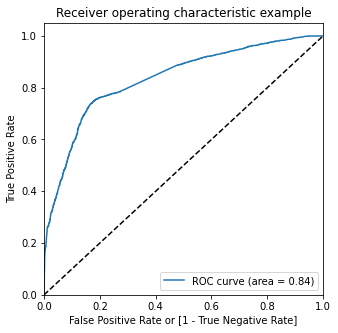

In [78]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under the curve of the ROC is 0.84 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [79]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.218804          0    1    1    1    0    0    0    0   
1          0         0.218804          0    1    1    1    0    0    0    0   
2          0         0.214330          0    1    1    1    0    0    0    0   
3          0         0.218804          0    1    1    1    0    0    0    0   
4          1         0.956493          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    1    1    1

In [80]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.378020  1.000000  0.000000
0.1   0.1  0.431549  0.993734  0.089871
0.2   0.2  0.639034  0.899749  0.480579
0.3   0.3  0.791094  0.755639  0.812643
0.4   0.4  0.795516  0.696324  0.855801
0.5   0.5  0.783989  0.625313  0.880427
0.6   0.6  0.768988  0.529657  0.914445
0.7   0.7  0.747987  0.421888  0.946179
0.8   0.8  0.726196  0.319967  0.973090
0.9   0.9  0.686878  0.179198  0.995430


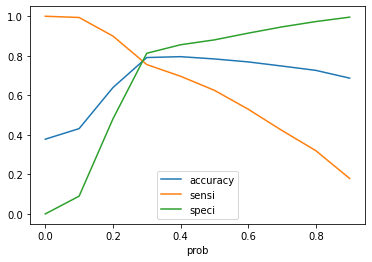

In [81]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As you can see that around 0.3, you get the optimal values of the three metrics. So let's choose 0.3 as our cutoff now

In [82]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.218804          0    1    1    1    0    0    0    0   
1          0         0.218804          0    1    1    1    0    0    0    0   
2          0         0.214330          0    1    1    1    0    0    0    0   
3          0         0.218804          0    1    1    1    0    0    0    0   
4          1         0.956493          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    0    0    0                0  
2    0    0    0                0  
3    0    0    0                0  
4    1    1    1                1

In [83]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7910942681193747

In [84]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3201,  738],
       [ 585, 1809]])

In [85]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [86]:
# Calculate Sensitivity

TP/(TP+FN)

0.7556390977443609

In [87]:
# Calculate Specificity

TN/(TN+FP)

0.8126428027418127

In [88]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3201,  738],
       [ 585, 1809]])

In [89]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [90]:
# Calculate Precision

TP/(TP+FP)

0.7102473498233216

In [91]:
# Calculate Recall

TP/(TP+FN)

0.7556390977443609

0.3 cutoff seems to give promising results

Making Predictions on test data

In [92]:
# Scale the test set as well using just 'transform'

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [93]:
# Select the columns in X_train for X_test as well

X_test = X_test[['Do Not Email','TotalVisits','Total Time Spent on Website','Lead Source_Facebook','Lead Source_Olark Chat','Lead Source_Reference','Lead Source_Welingak Website','Specialization_Hospitality Management','What is your current occupation_Working Professional']]
X_test.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
4462             0         0.00                     0.000000   
5243             0         0.08                     0.071460   
4597             0         0.08                     0.190857   
4680             0         0.00                     0.000000   
5355             0         0.00                     0.000000   

      Lead Source_Facebook  Lead Source_Olark Chat  Lead Source_Reference  \
4462                     0                       1                      0   
5243                     0                       0                      0   
4597                     0                       0                      0   
4680                     0                       0                      0   
5355                     0                       1                      0   

      Lead Source_Welingak Website  Specialization_Hospitality Management  \
4462                             0                                      0   
5243                             0                                      0   
4597                             0                                      0   
4680                             1                                      0   
5355                             0                                      0   

      What is your current occupation_Working Professional  
4462                                                  0     
5243                                                  0     
4597                                                  0     
4680                                                  0     
5355                                                  0

In [94]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test)

In [95]:
# Make predictions on the test set and store it in the variable 'y_test_pred'
X_test =X_test[X_train.columns]
y_test_pred = res.predict(sm.add_constant(X_test))

In [96]:
y_test_pred[:10]

4462    0.218804
5243    0.134357
4597    0.211600
4680    0.990328
5355    0.218804
7071    0.181383
6314    0.919449
2688    0.990328
6228    0.254990
3014    0.172031
dtype: float64

In [97]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

0
4462  0.218804
5243  0.134357
4597  0.211600
4680  0.990328
5355  0.218804

In [98]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)


In [99]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [100]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [101]:
# Check 'y_pred_final'

y_pred_final.head()

Converted         0
0          1  0.218804
1          0  0.134357
2          1  0.211600
3          1  0.990328
4          0  0.218804

In [102]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [103]:
# Make predictions on the test set using 0.3 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [104]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1366,  315],
       [ 258,  776]])

In [105]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [106]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7889502762430939

In [107]:
# Calculate sensitivity
TP / float(TP+FN)

0.7504835589941973

In [108]:
# Calculate specificity
TN / float(TN+FP)

0.8126115407495539

In [109]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1366,  315],
       [ 258,  776]])

In [110]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [111]:
# Calculate Precision

TP/(TP+FP)

0.7112740604949588

In [112]:
# Calculate Recall

TP/(TP+FN)

0.7504835589941973

Final Observation: Let us compare the values obtained for Train & Test:

Train Data:

Accuracy : 78% Sensitivity :62% Specificity : 88% Precision 

Test Data:

Accuracy : 78% Sensitivity : 75% Specificity : 81% Precision : 71% Recall : 75%

With the current cut off as 0.3 we have Precision around 71% and Recall around 75%

The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model